In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data_clean.csv')
df

,Unnamed: 0,Ozone,Solar.R,Wind,Temp C,Month,Day,Year,Temp,Weather
0,1,41.0,190.0,7.4,67,5,1,2010,67,S
1,2,36.0,118.0,8.0,72,5,2,2010,72,C
2,3,12.0,149.0,12.6,74,5,3,2010,74,PS
3,4,18.0,313.0,11.5,62,5,4,2010,62,S
4,5,NaN,NaN,14.3,56,5,5,2010,56,S
...,...,...,...,...,...,...,...,...,...,...
153,154,41.0,190.0,7.4,67,5,1,2010,67,C
154,155,30.0,193.0,6.9,70,9,26,2010,70,PS
155,156,NaN,145.0,13.2,77,9,27,2010,77,S
156,157,14.0,191.0,14.3,75,9,28,2010,75,S


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  158 non-null    int64  
 1   Ozone       120 non-null    float64
 2   Solar.R     151 non-null    float64
 3   Wind        158 non-null    float64
 4   Temp C      158 non-null    object 
 5   Month       158 non-null    object 
 6   Day         158 non-null    int64  
 7   Year        158 non-null    int64  
 8   Temp        158 non-null    int64  
 9   Weather     155 non-null    object 
dtypes: float64(3), int64(4), object(3)
memory usage: 12.5+ KB


In [4]:
print(type(df))
print(df.shape)


<class 'pandas.core.frame.DataFrame'>
(158, 10)


In [5]:
df.shape

(158, 10)

In [6]:
df.dtypes

Unnamed: 0      int64
Ozone         float64
Solar.R       float64
Wind          float64
Temp C         object
Month          object
Day             int64
Year            int64
Temp            int64
Weather        object
dtype: object

In [7]:
# Drop dupplicate column and Unnamed column

data1 = df.drop(['Unnamed: 0',"Temp C"], axis =1)
data1

,Ozone,Solar.R,Wind,Month,Day,Year,Temp,Weather
0,41.0,190.0,7.4,5,1,2010,67,S
1,36.0,118.0,8.0,5,2,2010,72,C
2,12.0,149.0,12.6,5,3,2010,74,PS
3,18.0,313.0,11.5,5,4,2010,62,S
4,NaN,NaN,14.3,5,5,2010,56,S
...,...,...,...,...,...,...,...,...
153,41.0,190.0,7.4,5,1,2010,67,C
154,30.0,193.0,6.9,9,26,2010,70,PS
155,NaN,145.0,13.2,9,27,2010,77,S
156,14.0,191.0,14.3,9,28,2010,75,S


In [8]:
data1.rename({'Solar.R': 'Solar'}, axis=1,inplace = True)
data1

,Ozone,Solar,Wind,Month,Day,Year,Temp,Weather
0,41.0,190.0,7.4,5,1,2010,67,S
1,36.0,118.0,8.0,5,2,2010,72,C
2,12.0,149.0,12.6,5,3,2010,74,PS
3,18.0,313.0,11.5,5,4,2010,62,S
4,NaN,NaN,14.3,5,5,2010,56,S
...,...,...,...,...,...,...,...,...
153,41.0,190.0,7.4,5,1,2010,67,C
154,30.0,193.0,6.9,9,26,2010,70,PS
155,NaN,145.0,13.2,9,27,2010,77,S
156,14.0,191.0,14.3,9,28,2010,75,S


In [9]:
data1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Ozone    120 non-null    float64
 1   Solar    151 non-null    float64
 2   Wind     158 non-null    float64
 3   Month    158 non-null    object 
 4   Day      158 non-null    int64  
 5   Year     158 non-null    int64  
 6   Temp     158 non-null    int64  
 7   Weather  155 non-null    object 
dtypes: float64(3), int64(3), object(2)
memory usage: 10.0+ KB


In [10]:
data1.isnull().sum()

Ozone      38
Solar       7
Wind        0
Month       0
Day         0
Year        0
Temp        0
Weather     3
dtype: int64

<Axes: >

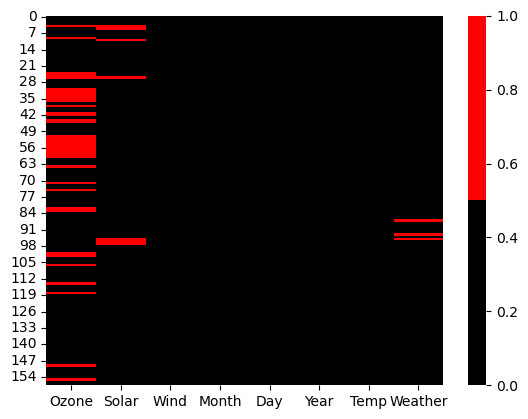

In [11]:
cols = data1.columns
colours = ['black','Red']
sns.heatmap(data1[cols].isnull(),cmap=sns.color_palette(colours),cbar = True)

In [12]:
#Find the mean and median values of ech numeric column
#Imputation of missing value with median
median_ozone=data1["Ozone"].median()
mean_ozone=data1["Ozone"].mean()
print("Median of Ozone :",median_ozone)
print("Mean of Ozone :",mean_ozone)

Median of Ozone : 30.5
Mean of Ozone : 41.583333333333336


In [13]:
data1['Ozone'] = data1['Ozone'].fillna(median_ozone)
data1.isnull().sum()

Ozone      0
Solar      7
Wind       0
Month      0
Day        0
Year       0
Temp       0
Weather    3
dtype: int64

In [14]:
data1['Solar',] = data1['Solar'].fillna(median_ozone)
data1.isnull().sum()

Ozone       0
Solar       7
Wind        0
Month       0
Day         0
Year        0
Temp        0
Weather     3
(Solar,)    0
dtype: int64

In [15]:

# Find the mode values of categorical column (weather)
print(data1["Weather"] . value_counts())
mode_weather = data1["Weather"].mode( ) [0]
print(mode_weather)


Weather
S     59
C     49
PS    47
Name: count, dtype: int64
S


In [16]:
data1["Weather"] = data1["Weather" ] . fillna(mode_weather)
data1.isnull().sum()

Ozone       0
Solar       7
Wind        0
Month       0
Day         0
Year        0
Temp        0
Weather     0
(Solar,)    0
dtype: int64

In [17]:
print(data1["Month"] . value_counts())
mode_weather = data1["Month"].mode( ) [0]
print(mode_weather)

Month
9      34
5      31
7      31
8      31
6      30
May     1
Name: count, dtype: int64
9


In [18]:
data1["Month"] = data1["Month" ] . fillna(mode_weather)
data1.isnull().sum()

Ozone       0
Solar       7
Wind        0
Month       0
Day         0
Year        0
Temp        0
Weather     0
(Solar,)    0
dtype: int64

In [19]:
data1.tail()

,Ozone,Solar,Wind,Month,Day,Year,Temp,Weather,"(Solar,)"
153,41.0,190.0,7.4,5,1,2010,67,C,190.0
154,30.0,193.0,6.9,9,26,2010,70,PS,193.0
155,30.5,145.0,13.2,9,27,2010,77,S,145.0
156,14.0,191.0,14.3,9,28,2010,75,S,191.0
157,18.0,131.0,8.0,9,29,2010,76,C,131.0


In [20]:
data1.reset_index(drop=True)

,Ozone,Solar,Wind,Month,Day,Year,Temp,Weather,"(Solar,)"
0,41.0,190.0,7.4,5,1,2010,67,S,190.0
1,36.0,118.0,8.0,5,2,2010,72,C,118.0
2,12.0,149.0,12.6,5,3,2010,74,PS,149.0
3,18.0,313.0,11.5,5,4,2010,62,S,313.0
4,30.5,NaN,14.3,5,5,2010,56,S,30.5
...,...,...,...,...,...,...,...,...,...
153,41.0,190.0,7.4,5,1,2010,67,C,190.0
154,30.0,193.0,6.9,9,26,2010,70,PS,193.0
155,30.5,145.0,13.2,9,27,2010,77,S,145.0
156,14.0,191.0,14.3,9,28,2010,75,S,191.0


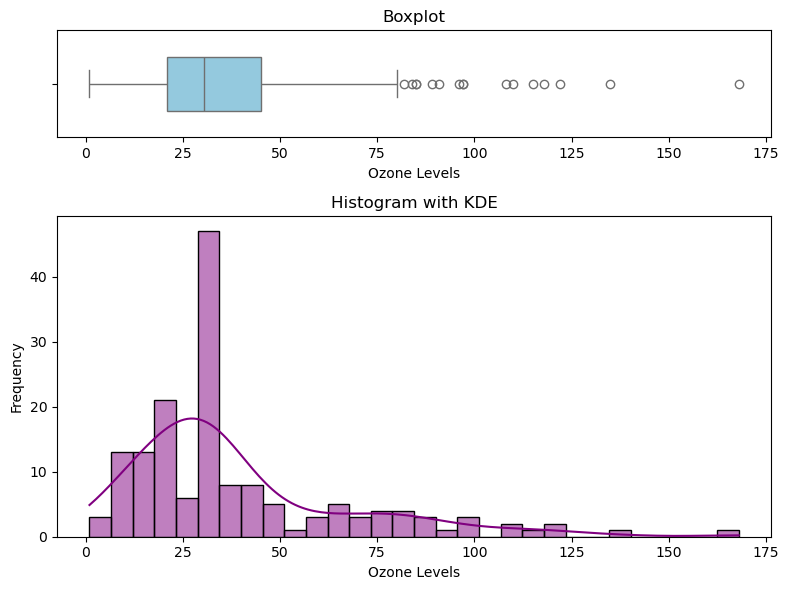

In [21]:
# Create a figure with two subplots, stacked vertically
fig, axes = plt. subplots(2, 1, figsize=(8, 6), gridspec_kw={ 'height_ratios': [1, 3]})
# Plot the boxplot in the first (top) subplot
sns. boxplot(data=data1["Ozone"], ax=axes[0], color='skyblue', width=0.5, orient = 'h')
axes [0].set_title("Boxplot")
axes[0].set_xlabel("Ozone Levels")
# Plot the histogram with KDE curve in the second (bottom) subplot
sns.histplot(data1["Ozone"], kde=True, ax=axes [1], color='purple', bins=30)
axes [1].set_title("Histogram with KDE")
axes [1].set_xlabel("Ozone Levels")
axes [1].set_ylabel("Frequency")
plt.tight_layout()
plt.show()


####Obseravtions
---->The ozone Column has extreme values beyond 81 as seen from box plot
---->The same is confirmed from the below right-skewed histogram


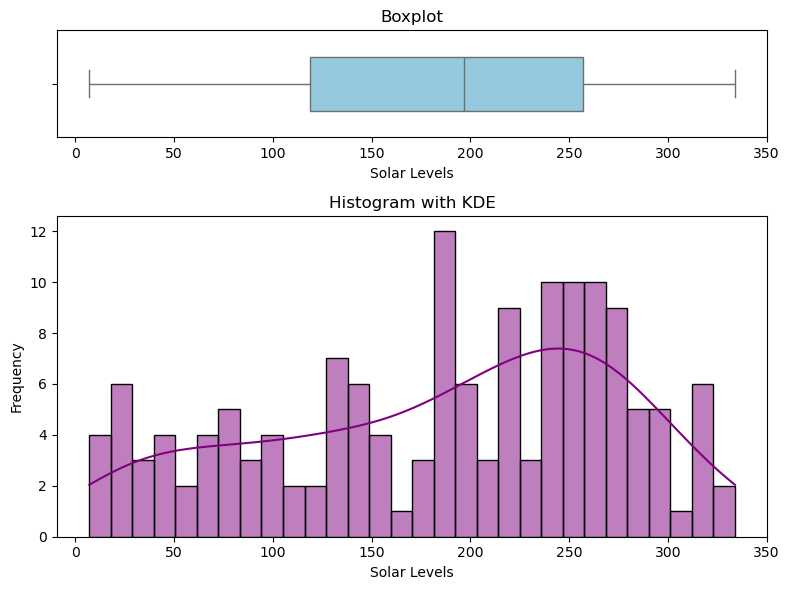

In [22]:
# Create a figure with two subplots, stacked vertically
fig, axes = plt. subplots(2, 1, figsize=(8, 6), gridspec_kw={ 'height_ratios': [1, 3]})
# Plot the boxplot in the first (top) subplot
sns. boxplot(data=data1["Solar"], ax=axes[0], color='skyblue', width=0.5, orient = 'h')
axes [0].set_title("Boxplot")
axes[0].set_xlabel("Solar Levels")
# Plot the histogram with KDE curve in the second (bottom) subplot
sns.histplot(data1["Solar"], kde=True, ax=axes [1], color='purple', bins=30)
axes [1].set_title("Histogram with KDE")
axes [1].set_xlabel("Solar Levels")
axes [1].set_ylabel("Frequency")
plt.tight_layout()
plt.show()


[array([115., 135.,  97.,  97.,  85., 108.,  82., 122.,  89., 110., 168.,
        118.,  84.,  85.,  96.,  91.])]

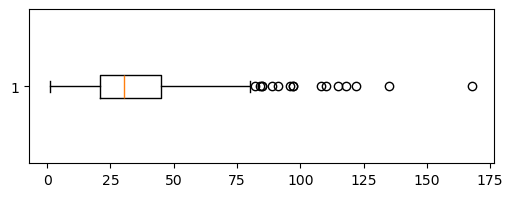

In [23]:
plt.figure(figsize=(6,2))
boxplot_data = plt.boxplot(data1["Ozone"], vert=False)
[item.get_xdata() for item in boxplot_data['fliers']]

Method 2 for outlier detection

.Using mu +/-3*sigma limits(standard deviation method)

In [24]:
data1["Ozone"].describe()

count    158.000000
mean      38.917722
std       28.794730
min        1.000000
25%       21.000000
50%       30.500000
75%       45.000000
max      168.000000
Name: Ozone, dtype: float64

In [25]:
mu = data1["Ozone"].describe()[1]
sigma = data1["Ozone"].describe()[2]

for x in data1["Ozone"]:
    if ((x < (mu - 3*sigma)) or (x > (mu + 3*sigma))):
        print(x)

135.0
168.0


C:\Users\Japa bharath kumar\AppData\Local\Temp\ipykernel_8732\3121128980.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  mu = data1["Ozone"].describe()[1]
C:\Users\Japa bharath kumar\AppData\Local\Temp\ipykernel_8732\3121128980.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sigma = data1["Ozone"].describe()[2]


Text(0.5, 0, 'Theoretical Qualities')

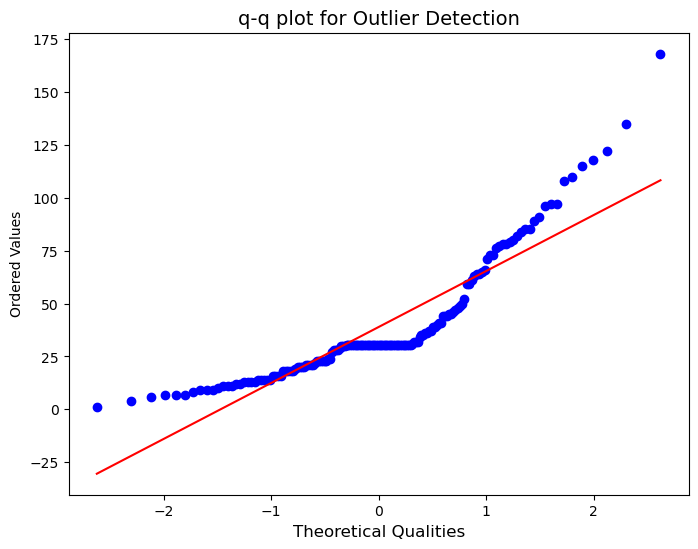

In [26]:
import scipy.stats as stats
plt.figure(figsize=(8, 6))
stats.probplot(data1["Ozone"], dist="norm", plot=plt)
plt.title("q-q plot for Outlier Detection", fontsize=14)
plt.xlabel("Theoretical Qualities", fontsize=12)

ervations from Q-Q plot
he data does not follow normal distribution as the data points are deviating significantly away from the red line
he data shows a right-skewed distribution and possible outliers
r visualisations that could help in the detection of outliers


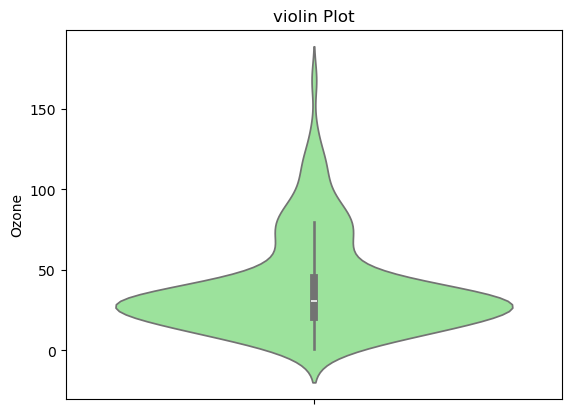

In [30]:
#create a figure for viol in plot
sns.violinplot(data=data1["Ozone"], color='lightgreen')
plt.title("violin Plot")

#Show the Plot
plt.show()

C:\Users\Japa bharath kumar\AppData\Local\Temp\ipykernel_8732\1222012946.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(data=data1, x = "Weather", y = "Ozone",color="orange",palette="Set2", size=6)


<Axes: xlabel='Weather', ylabel='Ozone'>

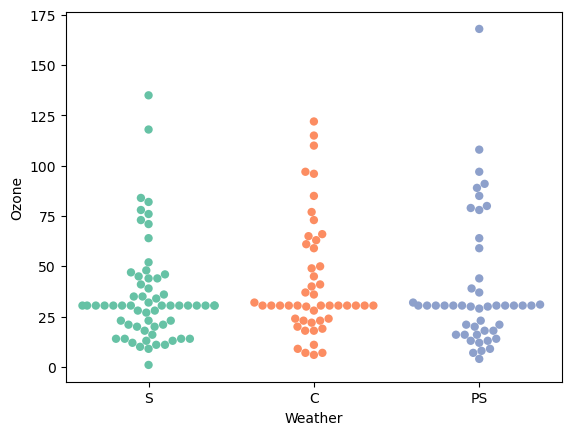

In [31]:
sns.swarmplot(data=data1, x = "Weather", y = "Ozone",color="orange",palette="Set2", size=6)

C:\Users\Japa bharath kumar\AppData\Local\Temp\ipykernel_8732\489543265.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(data=data1, x = "Weather", y = "Ozone",color="orange", palette="Set1", size=6, jitter = True)


<Axes: xlabel='Weather', ylabel='Ozone'>

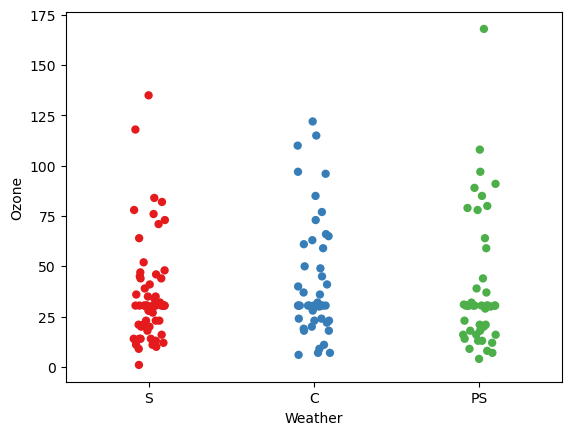

In [32]:
sns.stripplot(data=data1, x = "Weather", y = "Ozone",color="orange", palette="Set1", size=6, jitter = True)

<Axes: xlabel='Ozone', ylabel='Density'>

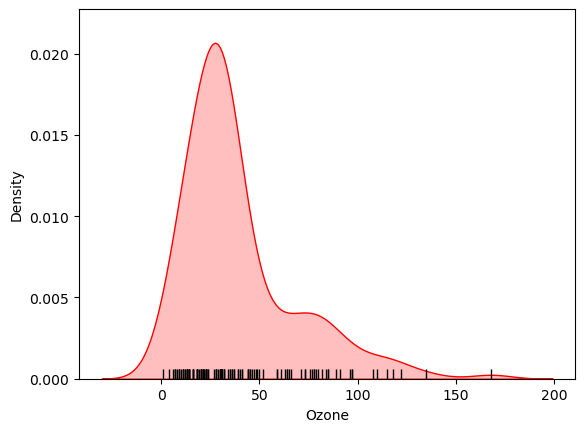

In [33]:
sns.kdeplot(data=data1["Ozone"], fill=True, color="red")
sns.rugplot(data=data1["Ozone"], color="black")

<Axes: xlabel='Weather', ylabel='Ozone'>

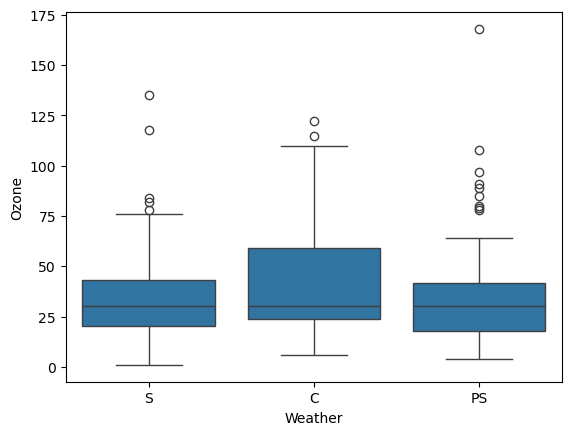

In [35]:
sns.boxplot(data = data1, x ="Weather", y="Ozone")

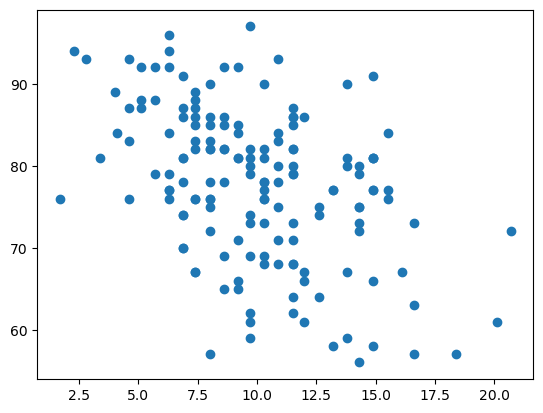

In [37]:
plt.scatter(data1["Wind"], data1["Temp"])

In [39]:
data1["Wind"].corr(data1["Temp"])

-0.4412467176312391

mild correlation